In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf 


In [38]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [39]:
#Dropping certain features 
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [40]:
X = df.drop(['total'], axis =1)
y = df['total']

In [41]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [42]:
# Train test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [45]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression


In [46]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
832/832 [==============================] - 4s 4ms/step - loss: 32.3497 - val_loss: 22.0732
Epoch 2/50
832/832 [==============================] - 3s 3ms/step - loss: 22.3620 - val_loss: 22.0241
Epoch 3/50
832/832 [==============================] - 3s 4ms/step - loss: 22.2379 - val_loss: 21.9177
Epoch 4/50
832/832 [==============================] - 3s 4ms/step - loss: 22.2359 - val_loss: 21.8926
Epoch 5/50
832/832 [==============================] - 4s 5ms/step - loss: 22.2432 - val_loss: 22.2800
Epoch 6/50
832/832 [==============================] - 4s 4ms/step - loss: 22.1517 - val_loss: 21.9427
Epoch 7/50
832/832 [==============================] - 3s 4ms/step - loss: 22.1153 - val_loss: 22.0000
Epoch 8/50
832/832 [==============================] - 3s 3ms/step - loss: 22.0823 - val_loss: 21.9250
Epoch 9/50
832/832 [==============================] - 3s 4ms/step - loss: 22.1049 - val_loss: 22.1157
Epoch 10/50
832/832 [==============================] - 3s 4ms/step - loss: 22.0668

<Axes: >

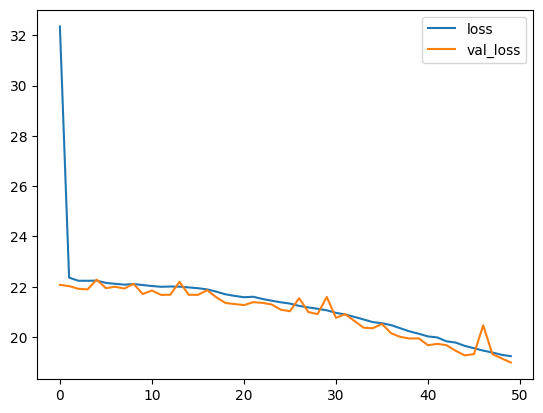

In [47]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


In [48]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 [==============================] - 1s 1ms/step


19.478191012244714

In [49]:
model.save('model.h5') 